## Q1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import probplot
from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import kruskal

In [5]:
data=pd.read_csv('bike_sharing.csv')
data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
618,2011-02-08 22:00:00,1,0,1,1,4.92,5.305,33,23.9994,0,29,29
122,2011-01-06 08:00:00,1,0,1,1,6.56,11.365,59,0.0000,3,216,219
64,2011-01-03 19:00:00,1,0,1,1,8.20,12.880,47,0.0000,8,102,110
1305,2011-03-19 06:00:00,1,0,0,1,18.04,21.970,44,27.9993,0,10,10
741,2011-02-14 06:00:00,1,0,1,1,13.94,15.150,46,19.9995,1,25,26


In [9]:
data.shape

(10886, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [62]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


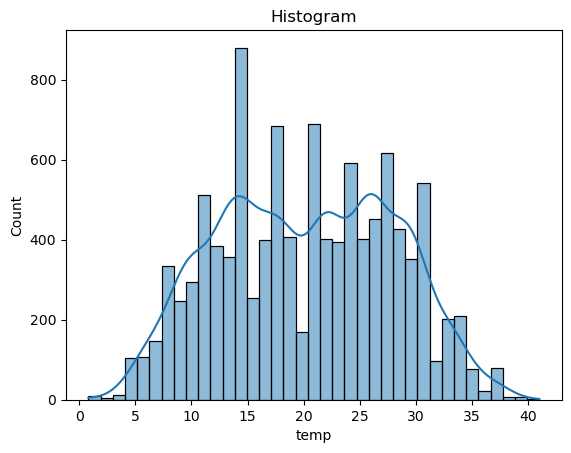

In [42]:
sns.histplot(data['temp'],kde=True)
plt.title('Histogram')
plt.show()

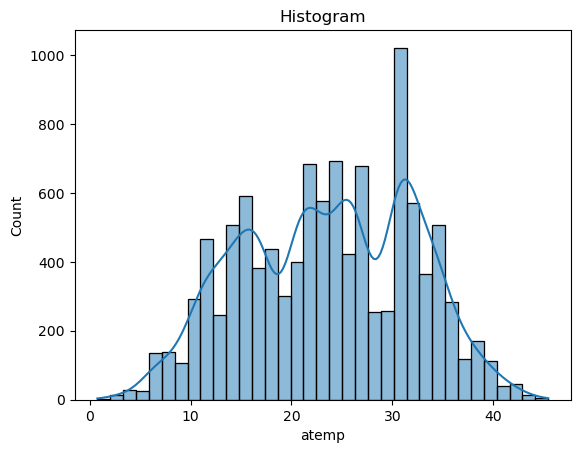

In [44]:
sns.histplot(data['atemp'],kde=True)
plt.title('Histogram')
plt.show()

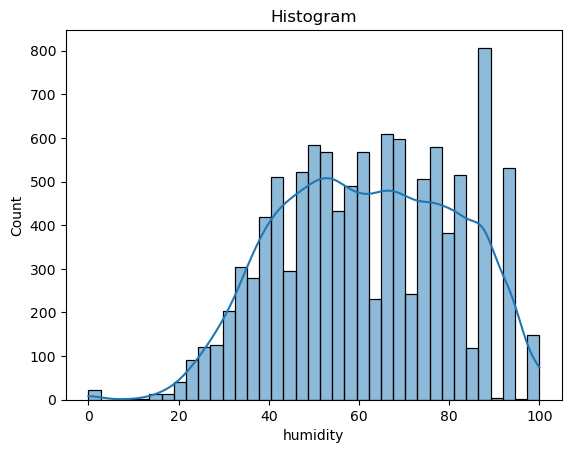

In [46]:
sns.histplot(data['humidity'],kde=True)
plt.title('Histogram')
plt.show()

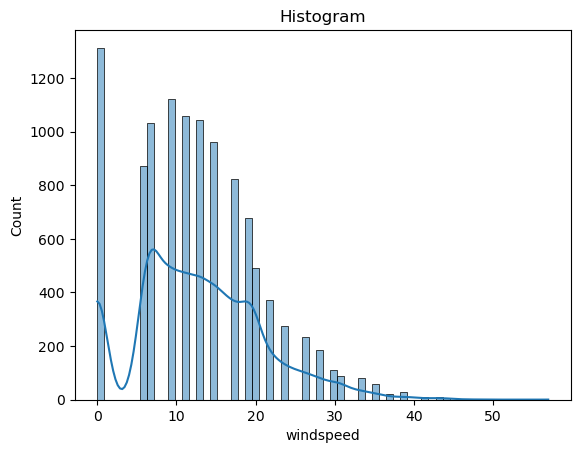

In [48]:
sns.histplot(data['windspeed'],kde=True)
plt.title('Histogram')
plt.show()

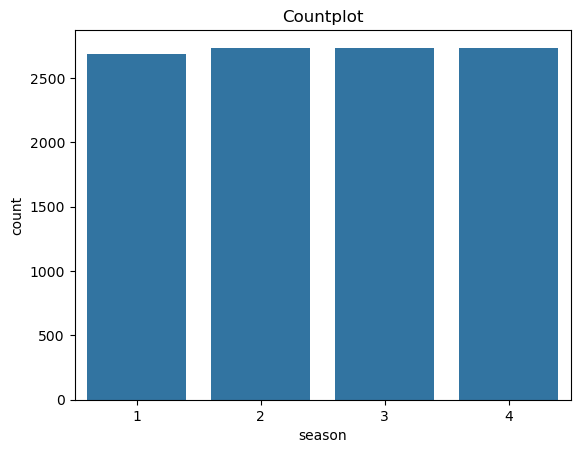

In [50]:
sns.countplot(x=data['season'])
plt.title('Countplot season')
plt.show()

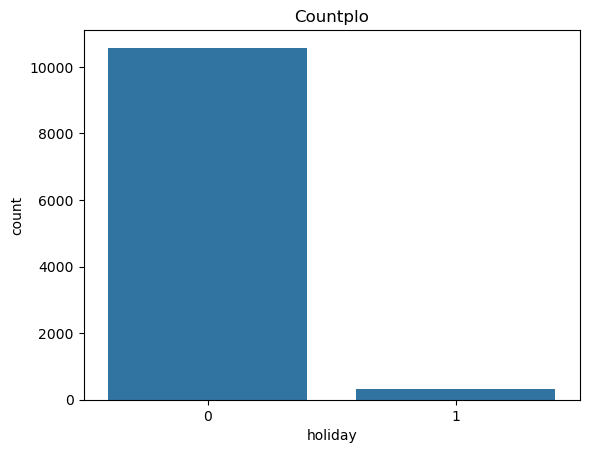

In [54]:
sns.countplot(x=data['holiday'])
plt.title('Countplot - holiday')
plt.show()

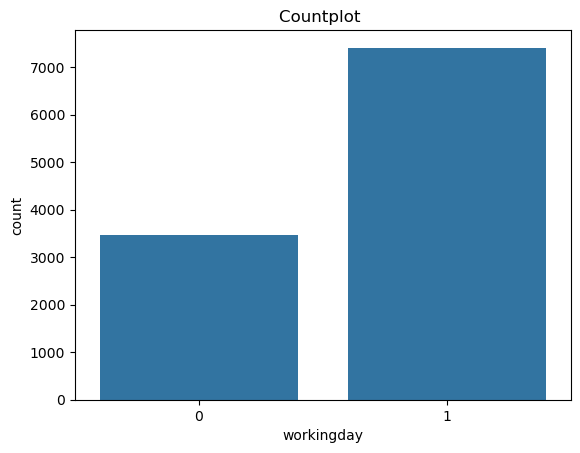

In [56]:
sns.countplot(x=data['workingday'])
plt.title('Countplot ')
plt.show()

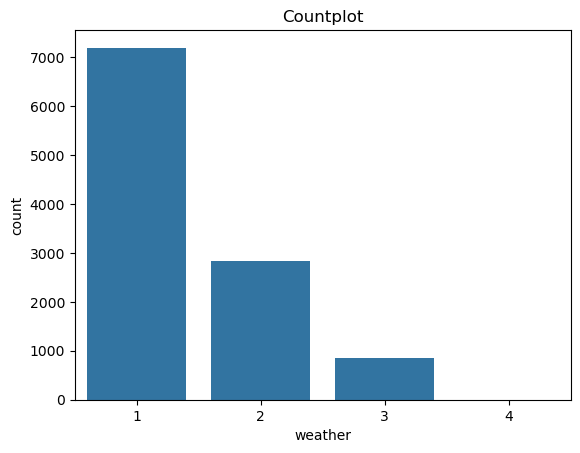

In [58]:
sns.countplot(x=data['weather'])
plt.title('Countplot')
plt.show()

In [64]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [66]:
data.median(numeric_only=True)

season          3.000
holiday         0.000
workingday      1.000
weather         1.000
temp           20.500
atemp          24.240
humidity       62.000
windspeed      12.998
casual         17.000
registered    118.000
count         145.000
dtype: float64

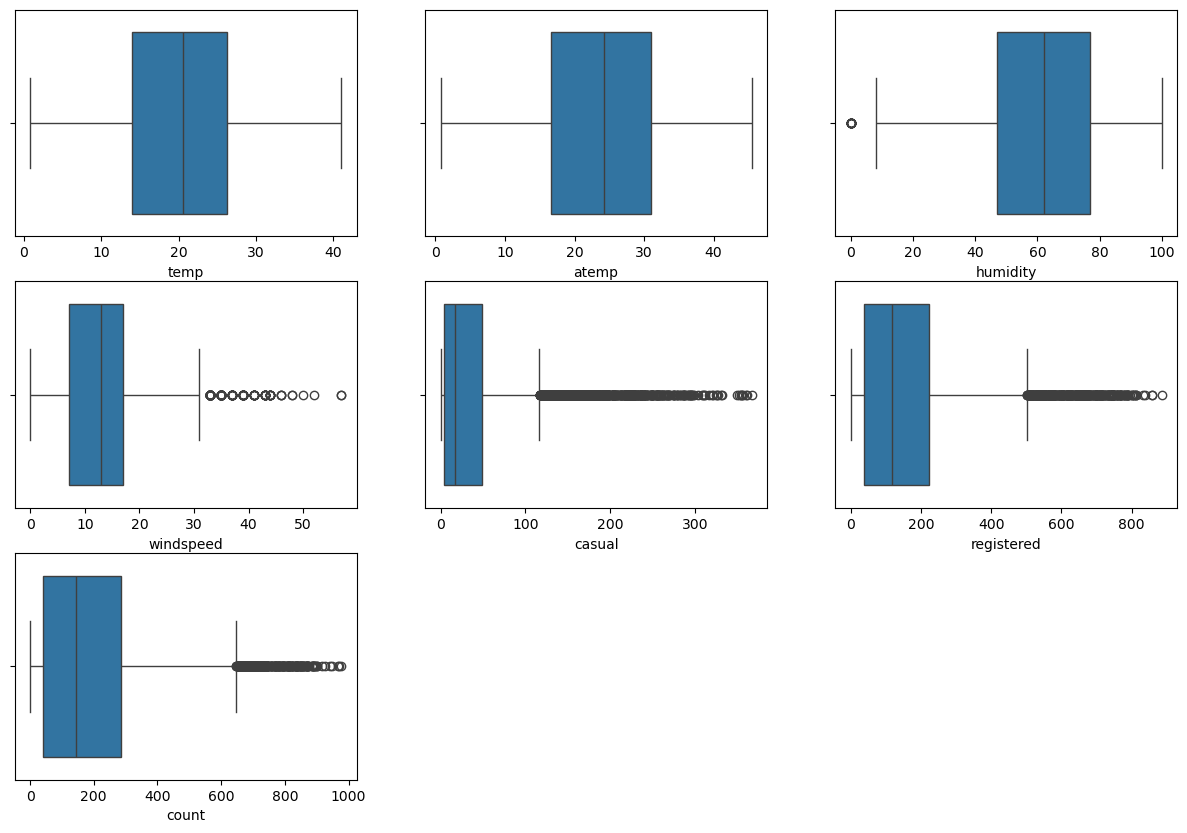

In [74]:
 import matplotlib.pyplot as plt
 plt.figure(figsize=(15,10))
 plt.subplot(3,3,1)
 sns.boxplot(data=data,x='temp')
 plt.subplot(3,3,2)
 sns.boxplot(data=data,x='atemp')
 plt.subplot(3,3,3)
 sns.boxplot(data=data,x='humidity')
 plt.subplot(3,3,4)
 sns.boxplot(data=data,x='windspeed')
 plt.subplot(3,3,5)
 sns.boxplot(data=data,x='casual')
 plt.subplot(3,3,6)
 sns.boxplot(data=data,x='registered')
 plt.subplot(3,3,7)
 sns.boxplot(data=data,x='count')
 plt.show()

## Q2. Try establishing a Relationship between the Dependent and Independent Variables.

In [78]:
 data_sub=data[['humidity','windspeed',"casual",'registered','count']]

In [86]:
for i in data_sub.columns:
    data[i]=(np.clip(data[i],np.round(data[i].quantile(0.05),2),np.round(data[i].quantile(0.95),2)))

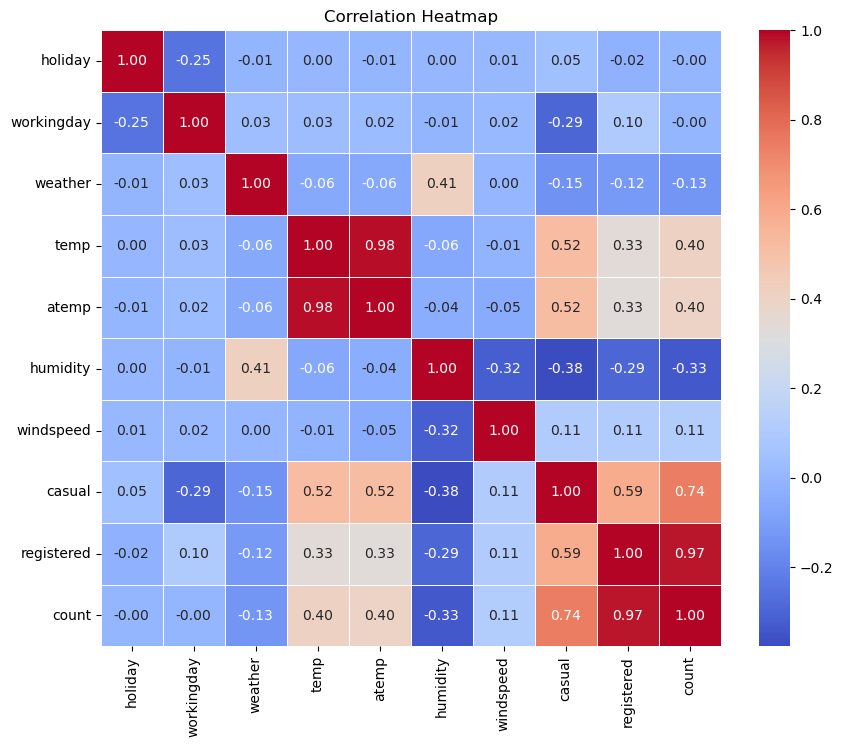

In [111]:
matrix= data.iloc[:,2:].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Highly Correlated Pairs (Correlation > 0.9):
('atemp', 'temp')
('count', 'registered')
to remove ['temp', 'registered']


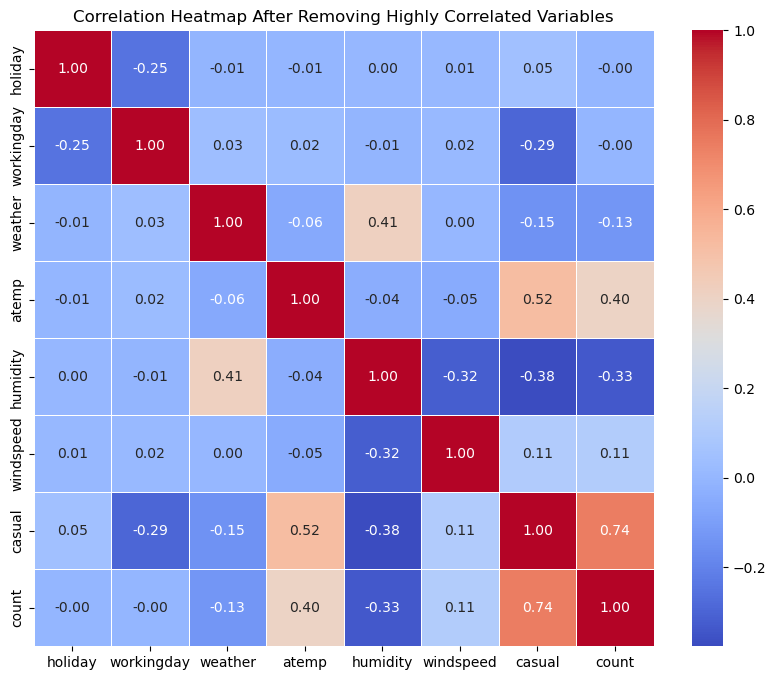

In [119]:
threshold=0.9
mask=np.triu(np.ones_like(matrix, dtype=bool))
high_corr_pairs=[]
for i in range(len(matrix.columns)):
    for j in range(i):
        if abs(matrix.iloc[i,j])>threshold:
            high_corr_pairs.append((matrix.columns[i],matrix.columns[j]))
print("Highly Correlated Pairs (Correlation > 0.9):")
for pair in high_corr_pairs:
    print(pair)
to_remove=[]
for pair in high_corr_pairs:
    to_remove.append(pair[1])
print('to remove',to_remove)
data_cleaned=data.drop(columns=to_remove)
matrix_cleaned=data_cleaned.iloc[:,2:].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_cleaned,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap After Removing Highly Correlated Variables')
plt.show()

In [121]:
data_cleaned.sample(5)

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,count
10874,2012-12-19 12:00:00,4,0,1,1,20.455,54,19.0012,33,236.0
9795,2012-10-12 12:00:00,4,0,1,1,25.760,39,28.0000,75,387.0
3575,2011-08-18 21:00:00,3,0,1,2,31.820,79,0.0000,12,149.0
1084,2011-03-09 17:00:00,1,0,1,2,15.150,76,19.9995,18,194.0
4319,2011-10-12 00:00:00,4,0,1,2,26.515,83,8.9981,2,25.0


## Q3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?

Null Hypothesis:- H0=There is no diff in number of bike rides during weekdays and weekends.

Alternative Hypotheses:- H1=There is a diff in number of bike rides during weekdays and weekends.

Appropriate test:- t test (2 sample)

Significance level:- Alpha=0.05

In [151]:
weekdays= data_cleaned[data_cleaned['workingday']==1]['count']
weekends= data_cleaned[data_cleaned['workingday']==0]['count']
print(weekdays.mean())
print(weekends.mean())
t_stat,p_value=ttest_ind(weekdays, weekends)
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")
alpha=0.05
if p_value<=alpha:
    print("Reject the Null Hypothesis: There is a significant difference in the number of bike rides between weekdays and weekends.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference in the number of bike rides between weekdays and weekends.")

185.59030760928223
185.87013241220495
T-statistic:-0.08269248463400732
P-value:0.9340975814430686
Fail to Reject the Null Hypothesis: There is no significant difference in the number of bike rides between weekdays and weekends.


## Q4. Check if the demand of bicycles on rent is the same for different Weather conditions?

Null Hypothesis:- H0=The demand is same wrt to all weathers condition.

Alternative Hypotheses:- H1=The demand is diff for atleast one weather condition.

Appropriate test:- Anova & Kruskal

Significance level:- Alpha=0.05

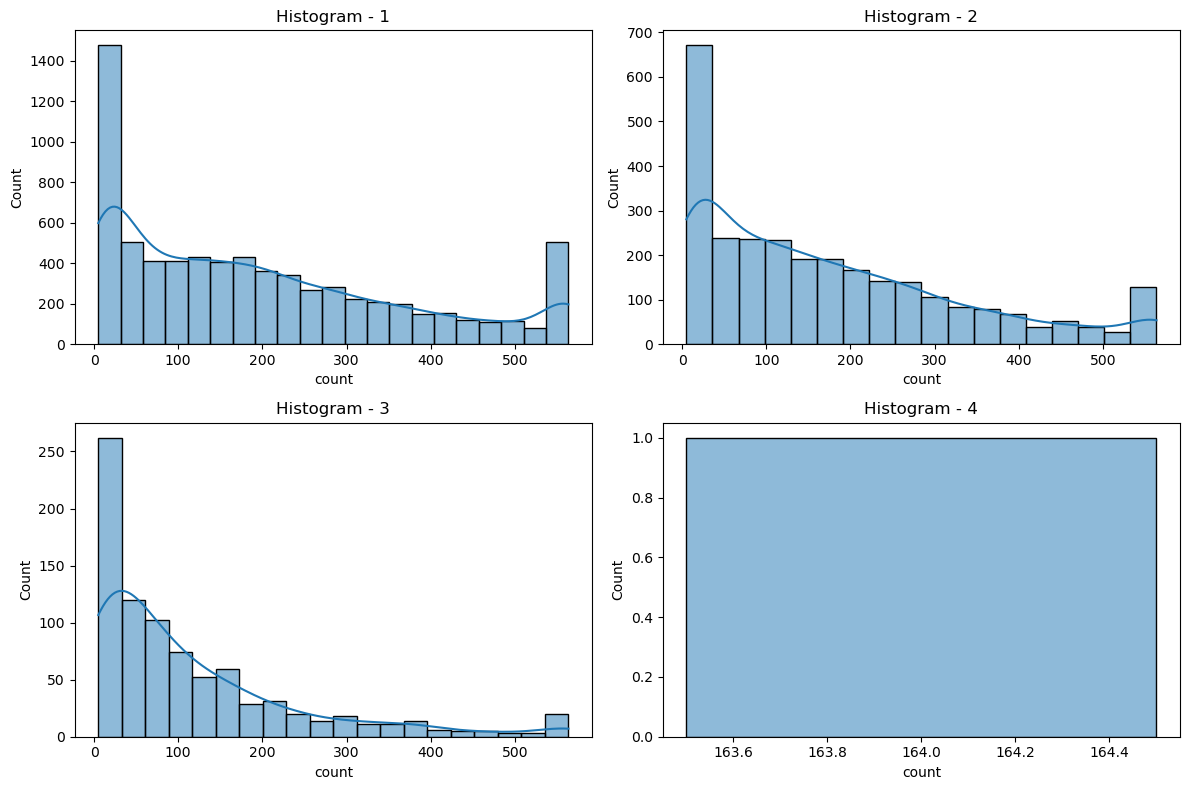

C:\Users\snith\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\snith\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\snith\anaconda3\Lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


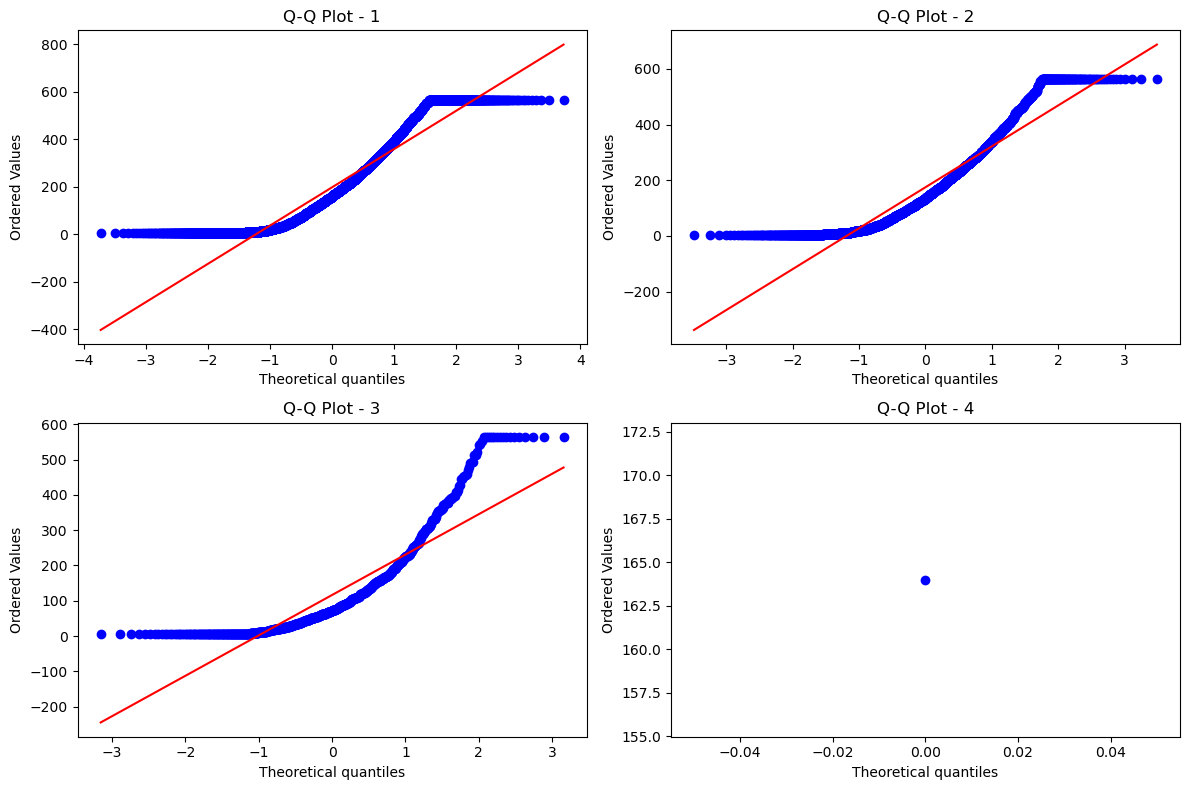

Skewness for 1: 0.7357642680514777
Kurtosis for 1: -0.5274231010768089
Skewness for 2: 0.9287849360064895
Kurtosis for 2: 0.006917375187375896
Skewness for 3: 1.6978865637597536
Kurtosis for 3: 2.6240190948963553
Skipping 4 because there are fewer than 3 data points.
Shapiro-Wilk Test for 1: Stat=0.9005876296352809, p-value=7.947124518292352e-56
Shapiro-Wilk Test for 2: Stat=0.8921620534849, p-value=1.0304707161063883e-40
Shapiro-Wilk Test for 3: Stat=0.7978652329597099, p-value=2.3122646766505864e-31
Skipping 4 because there are fewer than 3 data points.


C:\Users\snith\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


In [196]:
plt.figure(figsize=(12,8))
for i, condition in enumerate(data_cleaned['weather'].unique(),1):
    plt.subplot(2,2,i)
    sns.histplot(data_cleaned[data_cleaned['weather']==condition]['count'],kde=True)
    plt.title(f"Histogram - {condition}")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12,8))
for i, condition in enumerate(data_cleaned['weather'].unique(),1):
    plt.subplot(2,2,i)
    probplot(data_cleaned[data_cleaned['weather']==condition]['count'],dist="norm",plot=plt)
    plt.title(f"Q-Q Plot - {condition}")
plt.tight_layout()
plt.show()
for condition in data_cleaned['weather'].unique():
    group = data_cleaned[data_cleaned['weather']==condition]['count']
    if len(group)<3:
        print(f"Skipping {condition} because there are fewer than 3 data points.")
        continue
    skewness=skew(group)
    kurto=stats.kurtosis(group)
    print(f"Skewness for {condition}: {skewness}")
    print(f"Kurtosis for {condition}: {kurto}")
for condition in data_cleaned['weather'].unique():
    group=data_cleaned[data_cleaned['weather']==condition]['count']
    if len(group)<3:
        print(f"Skipping {condition} because there are fewer than 3 data points.")
        continue
    stat, p_value=stats.shapiro(group)
    
    print(f"Shapiro-Wilk Test for {condition}: Stat={stat}, p-value={p_value}")


In [201]:
levene_stat,levene_p=stats.levene(
    data_cleaned[data_cleaned['weather']==1]['count'],
    data_cleaned[data_cleaned['weather']==2]['count'],
    data_cleaned[data_cleaned['weather']==3]['count'],
    data_cleaned[data_cleaned['weather']==4]['count']
)
print(f"Levene's Test for Equality of Variances: Stat={levene_stat}, p-value={levene_p}")


Levene's Test for Equality of Variances: Stat=63.57158856138094, p-value=9.686704893616148e-41


In [221]:
f_stat,p_value_anova=stats.f_oneway(
    data_cleaned[data_cleaned['weather']==1]['count'],
    data_cleaned[data_cleaned['weather']==2]['count'],
    data_cleaned[data_cleaned['weather']==3]['count'],
    data_cleaned[data_cleaned['weather']==4]['count']
)
print(f"ANOVA Test: F-statistic = {f_stat}, p-value = {p_value_anova}")
if p_value<=alpha:
    print("Reject the Null Hypothesis: There is a significant difference.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference")

ANOVA Test: F-statistic = 70.17806608949765, p-value = 6.042523448552107e-45
Reject the Null Hypothesis: There is a significant difference.


In [260]:
groups=[data_cleaned[data_cleaned['weather']==condition]['count'] for condition in data['weather'].unique()]
stat,p_value=kruskal(*groups)
print(f"Kruskal-Wallis Test: Stat={stat},p-value={p_value}")
if p_value<=alpha:
    print("Reject the Null Hypothesis: There is a significant difference.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference")


Kruskal-Wallis Test: Stat=204.7853967605586, p-value=3.900417263983396e-44
Reject the Null Hypothesis: There is a significant difference.


## Q5. Check if the demand of bicycles on rent is the same for different Seasons?

Null Hypothesis:- H0=The demand is same wrt to all seasons condition.

Alternative Hypotheses:- H1=The demand is diff for atleast one season condition.

Appropriate test:- Anova

Significance level:- Alpha=0.05

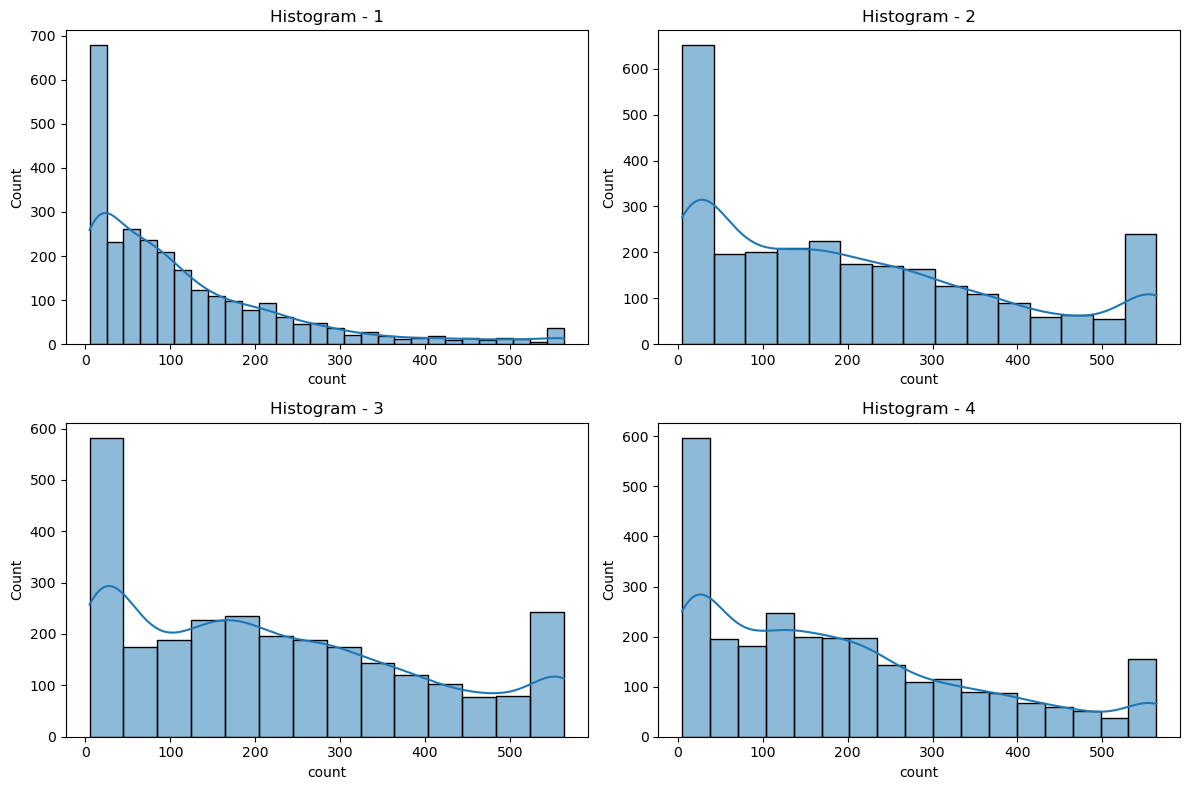

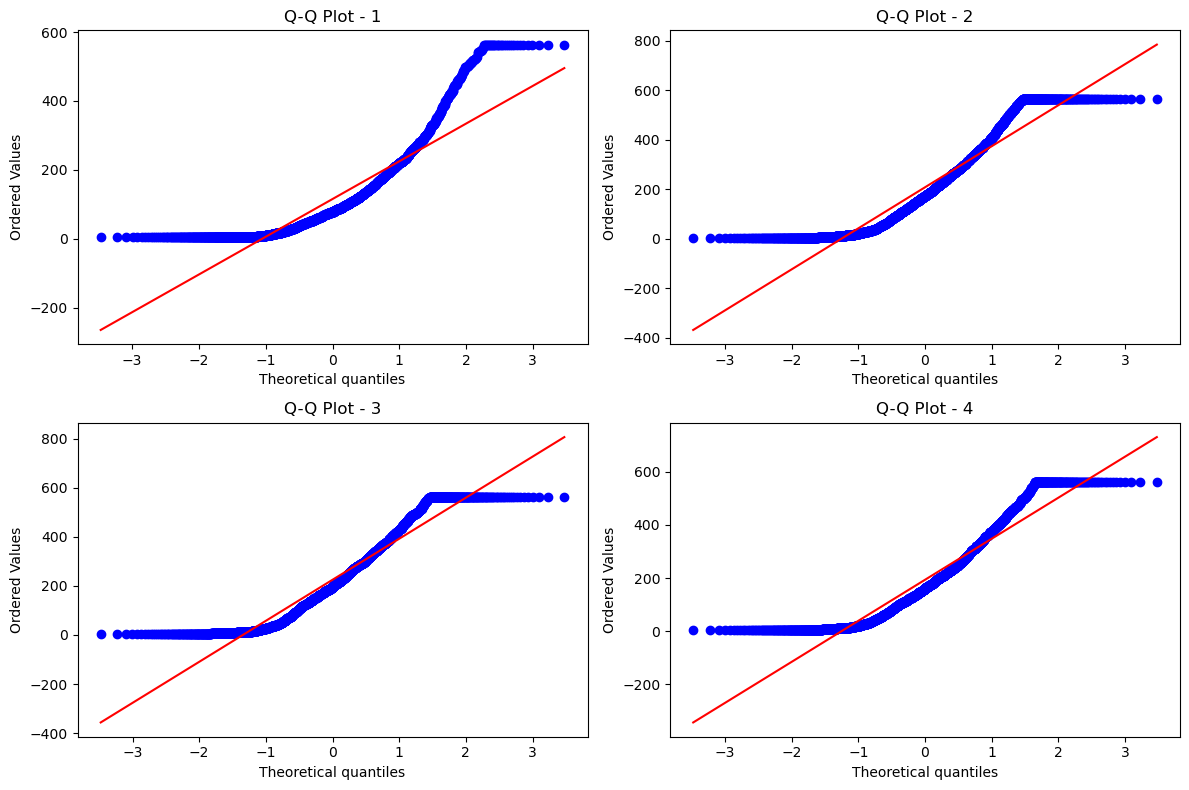

Skewness for 1: 1.6629679392332573
Kurtosis for 1: 2.758486690032222
Skewness for 2: 0.661003012949413
Kurtosis for 2: -0.6677502585203658
Skewness for 3: 0.49474220508586786
Kurtosis for 3: -0.8558955319748418
Skewness for 4: 0.7581458914471535
Kurtosis for 4: -0.3759563460739108
Shapiro-Wilk Test for 1: Stat=0.8186060836480267, p-value=6.417552662112538e-48
Shapiro-Wilk Test for 2: Stat=0.9038312929357656, p-value=1.90310193341982e-38
Shapiro-Wilk Test for 3: Stat=0.9241389341968056, p-value=4.3758070092005624e-35
Shapiro-Wilk Test for 4: Stat=0.9092504300636933, p-value=1.2901144042908721e-37


In [207]:
plt.figure(figsize=(12, 8))
for i, condition in enumerate(data_cleaned['season'].unique(), 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_cleaned[data_cleaned['season']==condition]['count'],kde=True)
    plt.title(f"Histogram - {condition}")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))
for i, condition in enumerate(data_cleaned['season'].unique(), 1):
    plt.subplot(2, 2, i)
    probplot(data_cleaned[data_cleaned['season']==condition]['count'],dist="norm",plot=plt)
    plt.title(f"Q-Q Plot - {condition}")
plt.tight_layout()
plt.show()
for condition in data_cleaned['season'].unique():
    group=data_cleaned[data_cleaned['season']==condition]['count']
    if len(group)<3:
        print(f"Skipping {condition} because there are fewer than 3 data points.")
        continue
    skewness=skew(group)
    kurto=stats.kurtosis(group)
    print(f"Skewness for {condition}: {skewness}")
    print(f"Kurtosis for {condition}: {kurto}")
for condition in data_cleaned['season'].unique():
    group=data_cleaned[data_cleaned['season']==condition]['count']
    if len(group)<3:
        print(f"Skipping {condition} because there are fewer than 3 data points.")
        continue
    stat,p_value=stats.shapiro(group)
    print(f"Shapiro-Wilk Test for {condition}: Stat={stat},p-value={p_value}")


In [219]:
levene_stat,levene_p=stats.levene(
    data_cleaned[data_cleaned['season']==1]['count'],
    data_cleaned[data_cleaned['season']==2]['count'],
    data_cleaned[data_cleaned['season']==3]['count'],
    data_cleaned[data_cleaned['season']==4]['count']
)
print(f"Levene's Test for Equality of Variances:Stat={levene_stat},p-value={levene_p}")

f_stat, p_value_anova=stats.f_oneway(
    data_cleaned[data_cleaned['season']==1]['count'],
    data_cleaned[data_cleaned['season']==2]['count'],
    data_cleaned[data_cleaned['season']==3]['count'],
    data_cleaned[data_cleaned['season']==4]['count']
)
print(f"ANOVA Test: F-statistic={f_stat},p-value={p_value_anova}")
if p_value<=alpha:
    print("Reject the Null Hypothesis: There is a significant difference.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant difference")



Levene's Test for Equality of Variances: Stat=209.59045184537882, p-value=3.5700319866685975e-132
ANOVA Test: F-statistic = 247.739041074608, p-value = 1.6168920873357097e-155
Reject the Null Hypothesis: There is a significant difference.


## Q6. Check if the Weather conditions are significantly different during different Seasons?

Null Hypothesis:- H0=There is no association between Weather conditions and Seasons..

Alternative Hypotheses:- H1=There is an association between Weather conditions and Seasons.

Appropriate test:- Chi-Square

Significance level:- Alpha=0.05

In [229]:
contingency_table=pd.crosstab(data['weather'], data['season'])
print("Contingency Table:")
print(contingency_table)
chi2_stat,p_value,dof,expected=stats.chi2_contingency(contingency_table)
print("\nChi-square Test Results:")
print(f"Chi-square Statistic:{chi2_stat}")
print(f"p-value:{p_value}")
print(f"Degrees of Freedom:{dof}")
print(f"Expected Frequencies:\n{expected}")
alpha = 0.05
if p_value <= alpha:
    print("\nReject the null hypothesis: Weather and Season are dependent.")
else:
    print("\nFail to reject the null hypothesis: Weather and Season are independent.")

Contingency Table:
season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0

Chi-square Test Results:
Chi-square Statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
Degrees of Freedom: 9
Expected Frequencies:
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]

Reject the null hypothesis: Weather and Season are dependent.


## Insights.

1.There’s no significant difference in bike rentals between weekdays and weekends, so operational decisions should not differentiate between these two days.

2.Weather conditions and seasons significantly affect bike rental demand, so the company should adjust pricing, promotions, and fleet size based on these factors.

3.Weather and seasonality are dependent, so the company can optimize bike rental strategies based on the expected weather patterns and adjust for each season.

## Actionable Recommendation

1.Weather Forcasting : Given that weather and season significantly impact demand, the company should implement a data-driven demand forecasting system that takes weather predictions and seasonal trends into account to anticipate busy and slow days. This would help ensure adequate fleet management and resource allocation.

2.Pricing based on weather/season : Higher prices during good weather and discount/deals during rainy/colder weather to attract customers

3.Customers could be either tourist or normal commuters : Communters prefer to ride even during rainy/cold days, wher as tourists prefer pleasant weather/season, so incorporating appropriate discounts/pricing would be beneficial.